## Extract frames from video

In [ ]:
# import os
import cv2
# Function to extract frames
def FrameCapture(path):
    # Path to video file
    vidObj = cv2.VideoCapture(path)
    count = 0    
    success = 1
    while success:
        success, image = vidObj.read()
        # Saves the frames with frame-count
        cv2.imwrite("/home/jhanvipatel/Downloads/poseestimation_mediapipe/save_dir/frame%d.jpg" % count, image) 
        count += 1
# Driver Code
if __name__ == '__main__':
    FrameCapture("aa6f5e6d-6a03-466d-aae4-16c493e5b513.mp4")

### Install mediapipe dependencies

In [1]:
!pip install mediapipe

You should consider upgrading via the '/home/jhanvipatel/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [2]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [18]:
import cv2
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imwrite('grayscale.jpg',img)
    return img

## Code to Extract Keypoints, Calculate Angles & store them to csv

In [20]:
import cv2
import glob
import pandas as pd
c = 0
        
#angle lists
filename_list = []
Distance_shoulderList = []
Distance_kneeList = []
Distance_KneeshoulderList = []
rightKneeAngleList = []
rightHipAngleList = []
rightTrunkAngleList = []
rightShoulderAngleList = []
rightElbowAngleList = []
rightNeckAngleList = []
leftkneeAngleList = []
leftHipAngleList = []
leftTrunkAngleList = []
leftShoulderAngleList = []
leftElbowAngleList = []

#iterate all frames
for file in glob.glob('pose_estimation/save_dir/*.jpg'):
    print("filename:",file)
    filename_list.append(file)
    img = cv2.imread(file)
    c = c + 1
    resize_and_show(img)
    detail_list = []
    # Run MediaPipe Pose and draw pose landmarks.
    with mp_pose.Pose(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        #image = cv2.imread('images/frame0.jpg')
        # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # Print nose landmark.
        image_hight, image_width, _ = img.shape
        #extract keypoints
        nose_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
        nose_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_width
        
        
        left_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
        left_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_hight
        right_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        right_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_hight


        left_elbowX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width
        left_elbowY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_hight
        right_elbowX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
        right_elbowY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_hight

        left_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width
        left_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight
        right_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width
        right_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight
 

        left_pinkyX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_PINKY].x * image_width
        left_pinkyY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_PINKY].y * image_hight
        right_pinkyX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_PINKY].x * image_width
        right_pinkyY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_PINKY].y * image_hight
  
        left_indexX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].x * image_width
        left_indexY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].y * image_hight
        right_indexX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].x * image_width
        right_indexY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].y * image_hight
   
        left_thumbX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_THUMB].x * image_width
        left_thumbY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_THUMB].y * image_hight
        right_thumbX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_THUMB].x * image_width
        right_thumbY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_THUMB].y * image_hight
        
        left_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
        left_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight
        right_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
        right_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight
       
        left_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width
        left_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight
        right_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * image_width
        right_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * image_hight
        
        left_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * image_width
        left_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_hight
        right_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x * image_width
        right_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * image_hight
        
        left_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * image_width
        left_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * image_hight
        right_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width
        right_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_hight
        
        left_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width
        left_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight
        right_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * image_width
        right_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * image_hight
        #print all the keypoints fetched
        print("Nose_x: ",nose_x, "Nose_y: ",nose_y)
        print("l_shoulder:",left_shoulderX , left_shoulderY , "R_shoulder:",right_shoulderX, right_shoulderY)
        print("L_elbow:",left_elbowX , left_elbowY , "R_elbow: ",right_elbowX, right_elbowY)
        print("L_wrist:",left_wristX , left_wristY , "R_wrist: ",right_wristX, right_wristY)
        print("L_pinky:",left_pinkyX , left_pinkyY , "R_pinky: ",right_pinkyX, right_pinkyY)
        print("L_index:",left_indexX , left_indexY , "R_index: ",right_indexX, right_indexY)
        print("L_thumb:",left_thumbX , left_thumbY , "R_thumb: ",right_thumbX, right_thumbY)
        print("L_hip:",left_hipX , left_hipY , "R_hip: ",right_hipX, right_hipY)
        print("L_knee:",left_kneeX , left_kneeY , "R_knee: ",right_kneeX ,right_kneeY)
        print("L_ankle:",left_ankleX , left_ankleY , "R_ankle: ",right_ankleX ,right_ankleY)
        print("L_heel:",left_heelX , left_heelY , "R_heel: ",right_heelX ,right_heelY)
        print("L_foot:",left_footX , left_footY , "R_foot: ",right_footX ,right_footY)

        #calculate distances required
        left_shoulder = [left_shoulderX,left_shoulderY]
        right_shoulder = [right_shoulderX,right_shoulderY]
        dis_LSRS = (math.dist(left_shoulder,right_shoulder))
        print("Distance_shoulder::", dis_LSRS)
        shoulder_center = dis_LSRS/2
        left_knee = [left_kneeX,left_kneeY]
        right_knee = [right_kneeX,right_kneeY]
        dis_LKRK = (math.dist(left_knee,right_knee))
        print("Distance_knee::", dis_LKRK)
        distance_kneeShoulder = dis_LKRK/dis_LSRS 
        print("Distance_Kneeshoulder::", distance_kneeShoulder)

        #append the distances
        Distance_shoulderList.append(dis_LSRS)
        Distance_kneeList.append(dis_LKRK)
        Distance_KneeshoulderList.append(distance_kneeShoulder)
        
        
        #angle calculus 
        def CalculateAngle(kp1,kp2,kp3,kp4,kp5,kp6):
            a = np.array([kp1, kp2])
            b = np.array([kp3, kp4])
            c = np.array([kp5, kp6])
            ba = a - b
            bc = c - b
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            return np.degrees(angle)

        def angleforShoulder(p1,p2,p5,p6,sp):
            a1 = np.array([p1,p2])
            b1 = np.array([p5,p6])
            c1 = np.array([sp])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateTrunkangle(p1,p2,sp,p5,p6):
            a1 = np.array([p1,p2])
            b1 = np.array([sp])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateHipangle(sp,p1,p2,p5,p6):
            a1 = np.array([sp])
            b1 = np.array([p1,p2])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)


        rightKneeAngle = CalculateAngle(right_hipX,right_hipY,right_kneeX,right_kneeY,right_footX,right_footY)
        print("rightKneeAngle:::: ",rightKneeAngle)
        rightKneeAngleList.append(rightKneeAngle)
        
        rightHipAngle = angleforShoulder(right_kneeX,right_kneeY,right_hipX,right_hipY,shoulder_center)
        print("rightHipAngle:",rightHipAngle)
        rightHipAngleList.append(rightHipAngle)

        rightTrunkAngle = calculateTrunkangle(right_shoulderX,right_shoulderY,shoulder_center,right_hipX,right_hipY)
        print("rightTrunkAngle",rightTrunkAngle)
        rightTrunkAngleList.append(rightTrunkAngle)
        
        rightShoulderAngle = angleforShoulder(right_elbowX,right_elbowY,right_shoulderX,right_shoulderY,shoulder_center)
        print("rightShoulderAngle",rightShoulderAngle)
        rightShoulderAngleList.append(rightShoulderAngle)
        
        rightElbowAngle = CalculateAngle(right_ankleX,right_ankleY,right_elbowX,right_elbowY,right_shoulderX,right_shoulderY)
        print("rightElbowAngle",rightElbowAngle)
        rightElbowAngleList.append(rightElbowAngle)
        
        rightNeckAngle = calculateTrunkangle(right_shoulderX,right_shoulderY,shoulder_center,nose_x,nose_y)
        print("rightNeckAngle",rightNeckAngle)
        rightNeckAngleList.append(rightNeckAngle)

        leftkneeAngle = CalculateAngle(left_hipX,left_hipY,left_kneeX,left_kneeY,left_footX,left_footY)
        print("leftkneeAngle:::: ",leftkneeAngle)
        leftkneeAngleList.append(leftkneeAngle)
        
        leftHipAngle = angleforShoulder(left_kneeX,left_kneeY,left_hipX,left_hipY,shoulder_center)
        print("leftHipAngle:",leftHipAngle)
        leftHipAngleList.append(leftHipAngle)

        leftTrunkAngle = calculateTrunkangle(left_shoulderX,left_shoulderY,shoulder_center,left_hipX,left_hipY)
        print("leftTrunkAngle:",leftTrunkAngle)
        leftTrunkAngleList.append(leftTrunkAngle)

        leftShoulderAngle = angleforShoulder(left_elbowX,left_elbowY,left_shoulderX,left_shoulderY,shoulder_center)
        print("leftShoulderAngle",leftShoulderAngle)
        leftShoulderAngleList.append(leftShoulderAngle)

        leftElbowAngle = CalculateAngle(left_ankleX,left_ankleY,left_elbowX,left_elbowY,left_shoulderX,left_shoulderY)
        print("leftElbowAngle",leftElbowAngle)
        leftElbowAngleList.append(leftElbowAngle)
        
        # Draw pose landmarks.
        print(f'Pose landmarks of {file}:')
        annotated_image = img.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        resize_and_show(annotated_image)
        print("---------------------------------------")
        
print("count:",c)
#create dictonary to save lists for angles & distance
data = {
    'image_name': filename_list,
    'Distance_shoulder': Distance_shoulderList,
    'Distance_knee': Distance_kneeList,
    'Distance_Kneeshoulder': Distance_KneeshoulderList,
    'rightKneeAngle' : rightKneeAngleList,
    'rightHipAngle' : rightHipAngleList,
    'rightTrunkAngle': rightTrunkAngleList,
    'rightShoulderAngle': rightShoulderAngleList,
    'rightElbowAngle': rightElbowAngleList,
    'rightNeckAngle': rightNeckAngleList,
    'leftkneeAngle' : leftkneeAngleList,
    'leftHipAngle' : leftHipAngleList,
    'leftTrunkAngle': leftTrunkAngleList,
    'leftShoulderAngle' : leftShoulderAngleList,
    'leftElbowAngle' : leftElbowAngleList
}
 
# Make data frame of above data
df = pd.DataFrame(data)
 
# append data frame to CSV file
df.to_csv('AngleDistanceDetails.csv', mode='a', index=False, header=False)
 
# print message
print("Data appended successfully.")

filename: pose_estimation/save_dir/frame95.jpg
Nose_x:  476.34579944610596 Nose_y:  250.8298077583313
l_shoulder: 513.8369550704956 176.17923259735107 R_shoulder: 450.38991355895996 179.01354789733887
L_elbow: 523.578290939331 227.95998573303223 R_elbow:  441.5395803451538 226.83832168579102
L_wrist: 536.073000907898 274.01905059814453 R_wrist:  428.4549627304077 268.78363609313965
L_pinky: 537.7981939315796 289.7372245788574 R_pinky:  426.8143310546875 283.3195495605469
L_index: 536.1561975479126 289.73894119262695 R_index:  428.1016044616699 283.61626625061035
L_thumb: 534.4210977554321 284.55296516418457 R_thumb:  430.5566129684448 278.7608242034912
L_hip: 497.8033046722412 274.0956401824951 R_hip:  459.72739696502686 272.61672019958496
L_knee: 493.073429107666 349.48413848876953 R_knee:  452.4954557418823 346.7600727081299
L_ankle: 496.3340702056885 420.19060134887695 R_ankle:  441.17919635772705 414.1969299316406
L_heel: 493.37331104278564 428.7853145599365 R_heel:  441.9314537048

Nose_x:  475.90702056884766 Nose_y:  345.2660813331604
l_shoulder: 511.3631944656372 230.96918106079102 R_shoulder: 446.3915719985962 227.29981899261475
L_elbow: 523.1267242431641 254.88842010498047 R_elbow:  440.68931674957275 253.50168228149414
L_wrist: 526.5853996276855 281.2416458129883 R_wrist:  439.31839179992676 271.57745361328125
L_pinky: 526.8604640960693 290.45742988586426 R_pinky:  437.19551277160645 281.25125885009766
L_index: 525.1186418533325 290.01294136047363 R_index:  437.58223056793213 278.6766529083252
L_thumb: 523.4800825119019 286.8665027618408 R_thumb:  440.0081253051758 274.6740531921387
L_hip: 497.70838165283203 294.06206130981445 R_hip:  460.4557466506958 293.15900802612305
L_knee: 499.19272899627686 353.7300109863281 R_knee:  445.9267120361328 353.04731369018555
L_ankle: 500.7022476196289 422.3134517669678 R_ankle:  441.9643077850342 418.01496505737305
L_heel: 496.22474193573 430.0184440612793 R_heel:  445.35434341430664 426.9635581970215
L_foot: 503.079113960

Nose_x:  479.94134998321533 Nose_y:  249.1260962486267
l_shoulder: 515.1566276550293 180.46807765960693 R_shoulder: 451.6078395843506 179.24903869628906
L_elbow: 521.4262475967407 232.05957412719727 R_elbow:  440.3359079360962 226.18660926818848
L_wrist: 524.4572639465332 276.21952056884766 R_wrist:  435.6516742706299 265.6938171386719
L_pinky: 526.4282054901123 291.71985626220703 R_pinky:  432.827335357666 280.8139228820801
L_index: 522.2583150863647 290.6400775909424 R_index:  437.4760866165161 279.4834327697754
L_thumb: 519.432409286499 285.76666831970215 R_thumb:  440.7859077453613 274.32887077331543
L_hip: 498.01604747772217 273.42761993408203 R_hip:  460.1843214035034 271.981143951416
L_knee: 494.2807912826538 349.33653831481934 R_knee:  454.8816728591919 345.8041763305664
L_ankle: 501.365647315979 422.4437141418457 R_ankle:  441.40118885040283 417.1663284301758
L_heel: 498.2528495788574 432.61219024658203 R_heel:  442.8618812561035 427.4786853790283
L_foot: 502.37138652801514 44

Nose_x:  488.2861852645874 Nose_y:  254.0653281211853
l_shoulder: 512.6579990386963 181.58268928527832 R_shoulder: 458.3498001098633 174.51234340667725
L_elbow: 538.0649185180664 194.51090812683105 R_elbow:  436.8994722366333 177.29126930236816
L_wrist: 509.49738597869873 168.8921070098877 R_wrist:  447.30334854125977 169.20337200164795
L_pinky: 503.9961471557617 161.7815923690796 R_pinky:  448.0814847946167 168.34525108337402
L_index: 500.61293506622314 158.44636917114258 R_index:  452.567684173584 167.69976139068604
L_thumb: 502.24310398101807 162.59167671203613 R_thumb:  453.1948938369751 169.2041301727295
L_hip: 496.8529119491577 272.8128147125244 R_hip:  460.9715051651001 271.37203216552734
L_knee: 503.91830825805664 344.83463287353516 R_knee:  446.49463272094727 340.2613162994385
L_ankle: 501.731237411499 416.2577247619629 R_ankle:  441.72047996520996 412.03296661376953
L_heel: 497.9099540710449 423.5636329650879 R_heel:  444.97308444976807 419.57353591918945
L_foot: 502.68724060

Nose_x:  481.4400520324707 Nose_y:  275.3274779319763
l_shoulder: 515.9454793930054 203.4065294265747 R_shoulder: 452.66811656951904 202.13574886322021
L_elbow: 522.2611455917358 252.88653373718262 R_elbow:  442.59505558013916 253.0099868774414
L_wrist: 527.3198146820068 300.09181022644043 R_wrist:  435.04675483703613 296.7996883392334
L_pinky: 528.2414979934692 314.1622066497803 R_pinky:  431.74714374542236 309.42060470581055
L_index: 527.5769863128662 315.06096839904785 R_index:  433.35315227508545 310.30420303344727
L_thumb: 525.2548599243164 309.4891834259033 R_thumb:  436.13427543640137 305.736780166626
L_hip: 497.3222703933716 289.5068836212158 R_hip:  460.5789747238159 286.28917694091797
L_knee: 497.9579210281372 364.4673156738281 R_knee:  450.6384925842285 358.19807052612305
L_ankle: 496.7774991989136 423.31372261047363 R_ankle:  441.2367162704468 417.70151138305664
L_heel: 493.9058504104614 430.7028579711914 R_heel:  442.49204540252686 423.4891891479492
L_foot: 502.38710594177

Nose_x:  491.3142194747925 Nose_y:  94.39323472976685
l_shoulder: 519.4629888534546 89.6973466873169 R_shoulder: 461.4212522506714 89.82453346252441
L_elbow: 542.8082895278931 51.260318756103516 R_elbow:  441.50515937805176 46.73978805541992
L_wrist: 524.7761001586914 7.047429084777832 R_wrist:  445.45715141296387 -3.045687675476074
L_pinky: 523.1518955230713 -2.3525190353393555 R_pinky:  445.2749376296997 -9.106764793395996
L_index: 517.7962760925293 -1.8243169784545898 R_index:  448.2618284225464 -9.71623420715332
L_thumb: 516.4654331207275 2.7217769622802734 R_thumb:  449.30780124664307 -7.811064720153809
L_hip: 503.23762226104736 190.21934509277344 R_hip:  466.16492652893066 189.36707496643066
L_knee: 496.9967622756958 275.6033706665039 R_knee:  460.78443908691406 274.22252655029297
L_ankle: 498.6361303329468 352.58697509765625 R_ankle:  450.8648319244385 347.70864486694336
L_heel: 493.41546535491943 365.29120445251465 R_heel:  453.97717475891113 360.45352935791016
L_foot: 510.9998

Nose_x:  476.75243186950684 Nose_y:  313.87918853759766
l_shoulder: 511.52534198760986 216.04260921478271 R_shoulder: 450.1874313354492 212.6980447769165
L_elbow: 525.2515239715576 253.10276985168457 R_elbow:  438.5743227005005 242.73293495178223
L_wrist: 533.7385416030884 283.09258460998535 R_wrist:  433.54289722442627 272.8568172454834
L_pinky: 535.9294033050537 294.0413188934326 R_pinky:  432.24950790405273 283.6420726776123
L_index: 533.0816116333008 294.09459114074707 R_index:  433.75644874572754 283.1915760040283
L_thumb: 530.7954730987549 290.7857322692871 R_thumb:  436.3149223327637 279.2007637023926
L_hip: 498.63471508026123 287.0463180541992 R_hip:  461.5607051849365 285.9079170227051
L_knee: 497.7105550765991 356.6246509552002 R_knee:  447.36309242248535 352.3633861541748
L_ankle: 499.395565032959 422.91446685791016 R_ankle:  441.62247371673584 417.3655700683594
L_heel: 496.4728660583496 431.7228126525879 R_heel:  446.4320077896118 425.59361457824707
L_foot: 502.858182907104

Nose_x:  479.43504333496094 Nose_y:  249.14676904678345
l_shoulder: 515.4749584197998 175.69602012634277 R_shoulder: 451.7824716567993 177.75352478027344
L_elbow: 520.2405185699463 227.0654010772705 R_elbow:  440.8034973144531 227.8991460800171
L_wrist: 520.7069454193115 272.68406867980957 R_wrist:  435.48553371429443 271.4253616333008
L_pinky: 519.0052556991577 289.60272789001465 R_pinky:  432.9600658416748 285.3318500518799
L_index: 514.4379825592041 287.3624038696289 R_index:  436.8745536804199 285.26272773742676
L_thumb: 513.6832990646362 281.9648551940918 R_thumb:  439.5069742202759 280.37750244140625
L_hip: 498.07862186431885 274.8848819732666 R_hip:  459.06834411621094 273.10709953308105
L_knee: 492.7869415283203 350.2068614959717 R_knee:  452.6756982803345 347.0467472076416
L_ankle: 498.13932609558105 420.54356575012207 R_ankle:  440.8584899902344 414.3515110015869
L_heel: 494.923113822937 429.75597381591797 R_heel:  442.26525115966797 423.26869010925293
L_foot: 501.04180717468

Nose_x:  483.07795429229736 Nose_y:  253.42720079421997
l_shoulder: 517.0563516616821 188.0596160888672 R_shoulder: 454.2124605178833 188.79321098327637
L_elbow: 520.7893838882446 233.99807453155518 R_elbow:  447.96740531921387 233.58633041381836
L_wrist: 524.7232809066772 271.24975204467773 R_wrist:  443.32744884490967 266.3771724700928
L_pinky: 525.6795873641968 281.3331127166748 R_pinky:  443.36277961730957 275.4828929901123
L_index: 525.0651149749756 280.60303688049316 R_index:  443.1271905899048 275.02979278564453
L_thumb: 522.8844633102417 276.87549591064453 R_thumb:  444.8081569671631 271.9108772277832
L_hip: 500.56380558013916 278.2724189758301 R_hip:  464.3125629425049 275.9372806549072
L_knee: 497.59076404571533 354.31623458862305 R_knee:  452.27159309387207 350.2532386779785
L_ankle: 497.15860652923584 422.142276763916 R_ankle:  441.2517786026001 416.2184715270996
L_heel: 492.3064126968384 431.1755561828613 R_heel:  442.45757389068604 423.22108268737793
L_foot: 502.469696044

Nose_x:  482.5396022796631 Nose_y:  265.0680332183838
l_shoulder: 516.0748233795166 196.32386684417725 R_shoulder: 453.44049072265625 195.86361408233643
L_elbow: 521.7696990966797 245.38335800170898 R_elbow:  446.55574131011963 245.47657012939453
L_wrist: 524.7302055358887 286.5805435180664 R_wrist:  438.6499376296997 286.5326499938965
L_pinky: 524.5558261871338 297.73072242736816 R_pinky:  437.0026845932007 300.1764392852783
L_index: 523.6373777389526 297.8766345977783 R_index:  438.0487585067749 300.75679779052734
L_thumb: 522.0871706008911 293.54161262512207 R_thumb:  440.15116691589355 295.4549217224121
L_hip: 498.71098709106445 284.4982624053955 R_hip:  462.5718021392822 281.9068908691406
L_knee: 498.5045623779297 357.5805473327637 R_knee:  452.2622928619385 353.81452560424805
L_ankle: 498.0721015930176 420.3896141052246 R_ankle:  441.84623527526855 416.5455150604248
L_heel: 493.9781799316406 428.8354969024658 R_heel:  443.8862714767456 423.26425552368164
L_foot: 502.6669216156006

Nose_x:  481.3330993652344 Nose_y:  251.66761207580566
l_shoulder: 514.1993608474731 179.29155349731445 R_shoulder: 453.04017639160156 178.70272636413574
L_elbow: 519.7810163497925 229.60763454437256 R_elbow:  442.56750869750977 226.02890968322754
L_wrist: 521.8670482635498 273.5613441467285 R_wrist:  435.10594272613525 265.53975105285645
L_pinky: 519.1701831817627 289.0194511413574 R_pinky:  431.67683601379395 280.61737060546875
L_index: 515.0839948654175 286.37014389038086 R_index:  435.7126817703247 279.3911361694336
L_thumb: 514.7346801757812 281.34615898132324 R_thumb:  438.8184537887573 274.3340492248535
L_hip: 496.7922077178955 272.61932373046875 R_hip:  459.10529232025146 270.7606029510498
L_knee: 495.2966899871826 349.68738555908203 R_knee:  453.80547428131104 346.14675521850586
L_ankle: 501.2805805206299 421.9486141204834 R_ankle:  441.37824153900146 416.6861343383789
L_heel: 498.1349792480469 431.4821147918701 R_heel:  442.2712154388428 426.6185188293457
L_foot: 502.60616683

Nose_x:  483.3192548751831 Nose_y:  244.6983518600464
l_shoulder: 516.5950298309326 175.27376174926758 R_shoulder: 452.9238224029541 174.6930170059204
L_elbow: 523.0792627334595 223.14404010772705 R_elbow:  442.84323024749756 221.10976696014404
L_wrist: 535.9309196472168 259.9684810638428 R_wrist:  436.9628553390503 255.5130958557129
L_pinky: 538.2152891159058 273.1571388244629 R_pinky:  434.1696014404297 268.3381175994873
L_index: 538.6198492050171 272.966251373291 R_index:  435.8834218978882 266.82071685791016
L_thumb: 536.6473913192749 268.3473300933838 R_thumb:  438.53343200683594 262.0759391784668
L_hip: 496.50349617004395 272.31642723083496 R_hip:  458.03581619262695 268.6846446990967
L_knee: 493.0470447540283 349.5366954803467 R_knee:  453.1507177352905 345.3936767578125
L_ankle: 497.58843898773193 420.8286952972412 R_ankle:  441.0202331542969 414.6112632751465
L_heel: 494.22069358825684 430.14495849609375 R_heel:  441.75848960876465 424.2955684661865
L_foot: 500.636438369751 44

Nose_x:  484.5878267288208 Nose_y:  238.36787605285645
l_shoulder: 518.4995050430298 176.2875509262085 R_shoulder: 454.19310188293457 175.8431053161621
L_elbow: 534.2700700759888 226.58068656921387 R_elbow:  443.8011541366577 225.7972812652588
L_wrist: 551.9344453811646 269.65888023376465 R_wrist:  435.33607292175293 269.8645305633545
L_pinky: 557.1988315582275 282.9390621185303 R_pinky:  433.70453929901123 285.14001846313477
L_index: 555.8879537582397 284.24832344055176 R_index:  436.63264656066895 285.741605758667
L_thumb: 552.2985696792603 279.8942184448242 R_thumb:  438.8574743270874 279.70988273620605
L_hip: 498.4189395904541 274.00033950805664 R_hip:  460.77033710479736 271.01972579956055
L_knee: 494.17323207855225 349.1154384613037 R_knee:  453.2461462020874 347.2806930541992
L_ankle: 498.05658435821533 420.48914909362793 R_ankle:  441.2986841201782 414.1951847076416
L_heel: 494.35241317749023 430.0517177581787 R_heel:  441.4179697036743 421.9632053375244
L_foot: 501.05970001220

Nose_x:  483.9321098327637 Nose_y:  242.83085012435913
l_shoulder: 516.9005727767944 176.0602855682373 R_shoulder: 453.3094787597656 175.8208465576172
L_elbow: 528.1165008544922 225.43001174926758 R_elbow:  442.5837335586548 225.0818109512329
L_wrist: 545.9502010345459 266.70315742492676 R_wrist:  433.8135643005371 266.85399055480957
L_pinky: 550.9583253860474 279.51539039611816 R_pinky:  428.01694202423096 282.0051097869873
L_index: 551.8158674240112 280.43211936950684 R_index:  432.75728034973145 281.5704917907715
L_thumb: 548.977578163147 276.3902950286865 R_thumb:  436.41914558410645 276.410608291626
L_hip: 497.7460880279541 274.2834949493408 R_hip:  460.0717582702637 271.46069526672363
L_knee: 494.1396703720093 349.1748905181885 R_knee:  452.5215873718262 347.86831855773926
L_ankle: 497.67552757263184 419.6956157684326 R_ankle:  441.7582368850708 413.5371780395508
L_heel: 494.19562339782715 428.7670040130615 R_heel:  442.25397968292236 420.6704521179199
L_foot: 500.7770538330078 4

Nose_x:  482.92434883117676 Nose_y:  249.46863794326782
l_shoulder: 515.5649785995483 179.64423179626465 R_shoulder: 453.7285957336426 178.75738620758057
L_elbow: 522.9256572723389 230.00853538513184 R_elbow:  441.5403890609741 226.93071842193604
L_wrist: 529.501932144165 275.00335693359375 R_wrist:  431.00843238830566 267.35283851623535
L_pinky: 527.416051864624 289.67227935791016 R_pinky:  426.52076721191406 281.0690975189209
L_index: 523.6667442321777 287.9528331756592 R_index:  430.2996435165405 280.4762077331543
L_thumb: 522.7294425964355 283.60530853271484 R_thumb:  434.14261054992676 275.6939220428467
L_hip: 497.38201427459717 273.65973472595215 R_hip:  460.87456035614014 272.1211624145508
L_knee: 495.36300468444824 350.01691818237305 R_knee:  454.1990661621094 346.5744209289551
L_ankle: 501.74129581451416 421.333065032959 R_ankle:  440.87875843048096 416.1664295196533
L_heel: 499.18974685668945 429.69457626342773 R_heel:  442.57867908477783 425.6183338165283
L_foot: 502.8245706

Nose_x:  484.8182601928711 Nose_y:  238.08199501037598
l_shoulder: 519.466628074646 176.11536026000977 R_shoulder: 454.57916259765625 175.67350387573242
L_elbow: 537.3122568130493 226.56354904174805 R_elbow:  444.4215908050537 222.52394199371338
L_wrist: 553.0336923599243 269.02785301208496 R_wrist:  436.15338134765625 261.49526596069336
L_pinky: 557.1142196655273 281.7750835418701 R_pinky:  436.2022581100464 276.20264053344727
L_index: 555.9976863861084 283.0341911315918 R_index:  439.6357116699219 275.82810401916504
L_thumb: 553.1068305969238 279.0136241912842 R_thumb:  441.443696975708 270.27013778686523
L_hip: 498.72544288635254 274.3553638458252 R_hip:  460.87966537475586 270.5636787414551
L_knee: 494.19744300842285 350.9651184082031 R_knee:  453.5628595352173 347.4110984802246
L_ankle: 497.64494800567627 420.3877544403076 R_ankle:  441.87464141845703 414.05736923217773
L_heel: 494.0955448150635 430.0663089752197 R_heel:  441.9677448272705 422.84010887145996
L_foot: 501.5588293075

Nose_x:  480.4233446121216 Nose_y:  248.72868824005127
l_shoulder: 515.1390380859375 180.14392375946045 R_shoulder: 451.8729467391968 178.41832637786865
L_elbow: 519.192928314209 230.6201934814453 R_elbow:  441.66290950775146 225.59537887573242
L_wrist: 522.815318107605 274.11234855651855 R_wrist:  437.16382122039795 264.0905284881592
L_pinky: 523.281795501709 289.8397636413574 R_pinky:  434.48085594177246 279.07130241394043
L_index: 518.9402551651001 288.4871292114258 R_index:  438.5655279159546 277.6873970031738
L_thumb: 517.1246376037598 283.61266136169434 R_thumb:  441.650071144104 272.1680545806885
L_hip: 497.3740282058716 273.69887351989746 R_hip:  458.843318939209 272.24215507507324
L_knee: 493.7431468963623 349.42920684814453 R_knee:  454.73478984832764 345.5471992492676
L_ankle: 500.6659564971924 421.7273426055908 R_ankle:  440.6399850845337 416.89661979675293
L_heel: 497.6441898345947 431.53661727905273 R_heel:  442.5148916244507 425.59115409851074
L_foot: 503.7722339630127 4

Nose_x:  476.6887454986572 Nose_y:  251.154456615448
l_shoulder: 512.9055671691895 176.18120670318604 R_shoulder: 449.8198699951172 179.15202140808105
L_elbow: 523.1650371551514 226.69950485229492 R_elbow:  441.16858196258545 227.66326904296875
L_wrist: 540.166669845581 272.9193305969238 R_wrist:  427.89932441711426 270.1392459869385
L_pinky: 542.0422840118408 288.4398078918457 R_pinky:  425.9365711212158 284.0364646911621
L_index: 540.3930597305298 289.21603202819824 R_index:  426.90263271331787 284.5850086212158
L_thumb: 538.4665975570679 284.5487594604492 R_thumb:  429.4829921722412 280.12218475341797
L_hip: 497.7181873321533 274.0781879425049 R_hip:  460.11805725097656 272.7448081970215
L_knee: 492.95758056640625 349.1726016998291 R_knee:  452.2710876464844 346.63639068603516
L_ankle: 496.26912021636963 420.52525520324707 R_ankle:  441.24540996551514 413.7448024749756
L_heel: 493.69482612609863 429.0870666503906 R_heel:  441.9508123397827 421.66050910949707
L_foot: 501.565349578857

Nose_x:  483.4665422439575 Nose_y:  263.29206800460815
l_shoulder: 512.5651483535767 188.78103733062744 R_shoulder: 454.35519886016846 191.92583084106445
L_elbow: 535.2111625671387 222.35315322875977 R_elbow:  421.0458116531372 217.78887748718262
L_wrist: 529.6892004013062 176.57770156860352 R_wrist:  435.3369827270508 173.30512046813965
L_pinky: 530.2553520202637 163.63171577453613 R_pinky:  437.9039478302002 161.28923892974854
L_index: 527.3971481323242 161.1125135421753 R_index:  441.22236156463623 158.52177143096924
L_thumb: 525.8950595855713 165.8829689025879 R_thumb:  441.5120334625244 163.6878204345703
L_hip: 497.3318738937378 283.0287551879883 R_hip:  461.8151979446411 281.4066982269287
L_knee: 497.75978565216064 358.42034339904785 R_knee:  451.01368618011475 356.24399185180664
L_ankle: 498.6211185455322 420.8470630645752 R_ankle:  440.5570411682129 417.46667861938477
L_heel: 494.54731369018555 429.442720413208 R_heel:  441.88768196105957 424.5826721191406
L_foot: 503.273104667

Nose_x:  477.42472743988037 Nose_y:  371.52912759780884
l_shoulder: 515.3935308456421 249.4848918914795 R_shoulder: 445.8748025894165 244.96347427368164
L_elbow: 520.2216148376465 278.1949996948242 R_elbow:  439.3750524520874 274.892520904541
L_wrist: 519.6781072616577 307.9281234741211 R_wrist:  436.74495697021484 301.92824363708496
L_pinky: 523.2407026290894 318.48069190979004 R_pinky:  435.4903860092163 311.8128776550293
L_index: 520.1220922470093 319.1721725463867 R_index:  436.4001407623291 312.29015350341797
L_thumb: 516.9688587188721 315.9298610687256 R_thumb:  438.17294692993164 309.5145034790039
L_hip: 497.02304553985596 305.43468475341797 R_hip:  457.2275047302246 303.2786464691162
L_knee: 500.91205883026123 357.7492332458496 R_knee:  438.6930522918701 358.6867332458496
L_ankle: 500.1290702819824 422.4068355560303 R_ankle:  441.9410066604614 418.60899925231934
L_heel: 496.0465211868286 429.451904296875 R_heel:  446.8773069381714 425.80942153930664
L_foot: 501.36771965026855 4

Nose_x:  489.99656867980957 Nose_y:  103.8290023803711
l_shoulder: 518.6801519393921 94.24570798873901 R_shoulder: 462.36012077331543 93.76586437225342
L_elbow: 541.9487257003784 55.342955589294434 R_elbow:  440.60187435150146 49.54589366912842
L_wrist: 522.0759496688843 9.219903945922852 R_wrist:  446.2706184387207 -1.6065216064453125
L_pinky: 520.1820888519287 -2.888474464416504 R_pinky:  445.70952129364014 -7.54511833190918
L_index: 515.2974452972412 -3.0992889404296875 R_index:  449.6300745010376 -7.835369110107422
L_thumb: 514.162766456604 2.953004837036133 R_thumb:  450.79821395874023 -6.090216636657715
L_hip: 502.00989055633545 193.1979274749756 R_hip:  465.62379455566406 192.17074871063232
L_knee: 495.94113540649414 278.3654308319092 R_knee:  461.13365268707275 276.3295269012451
L_ankle: 498.65826892852783 354.68456268310547 R_ankle:  451.6079912185669 350.93470573425293
L_heel: 492.8836841583252 369.38572883605957 R_heel:  454.91179752349854 364.15989875793457
L_foot: 512.3706

Nose_x:  482.4729337692261 Nose_y:  279.71840047836304
l_shoulder: 513.3295364379883 203.06532382965088 R_shoulder: 453.25453662872314 202.08088874816895
L_elbow: 532.3173751831055 252.0648193359375 R_elbow:  429.1643581390381 247.5047779083252
L_wrist: 530.9953775405884 221.40260696411133 R_wrist:  434.8447780609131 220.11048316955566
L_pinky: 533.0882329940796 211.9822597503662 R_pinky:  436.29440116882324 211.55184745788574
L_index: 531.41676902771 207.92192459106445 R_index:  438.2227840423584 207.35572814941406
L_thumb: 528.7943058013916 211.84224128723145 R_thumb:  439.02513122558594 210.7936191558838
L_hip: 497.1511764526367 291.45360946655273 R_hip:  461.2476816177368 291.1187267303467
L_knee: 498.26457595825195 365.06778717041016 R_knee:  449.71195697784424 361.54200553894043
L_ankle: 497.9893093109131 423.9279556274414 R_ankle:  440.74906063079834 418.6143493652344
L_heel: 493.7076139450073 432.2812843322754 R_heel:  442.63554191589355 425.0046730041504
L_foot: 504.0081262588

Code to add header for csv 
1. read existing csv
2. add headerlist
3. save new csv

In [21]:
import pandas as pd  
# read contents of csv file
file = pd.read_csv("AngleDistanceDetails.csv")
  
# adding header
headerList =  HeaderList = ['image_name',
              'Distance_shoulder','Distance_knee','Distance_Kneeshoulder','rightKneeAngle','rightHipAngle',
             'rightTrunkAngle','rightShoulderAngle','rightElbowAngle','rightNeckAngle',
              'leftkneeAngle','leftHipAngle','leftTrunkAngle','leftShoulderAngle','leftElbowAngle']
  
# converting data frame to csv
file.to_csv("FinalDetails.csv", header=headerList, index=False)
  
# display modified csv file
file2 = pd.read_csv("FinalDetails.csv")
print(file2)

                                image_name  Distance_shoulder  Distance_knee  \
0     pose_estimation/save_dir/frame54.jpg          54.955905      46.282627   
1     pose_estimation/save_dir/frame52.jpg          56.289108      44.136765   
2      pose_estimation/save_dir/frame2.jpg          61.644849      41.650600   
3     pose_estimation/save_dir/frame71.jpg          64.534086      41.146499   
4     pose_estimation/save_dir/frame25.jpg          65.075156      53.270392   
..                                     ...                ...            ...   
103   pose_estimation/save_dir/frame48.jpg          57.079014      38.707229   
104   pose_estimation/save_dir/frame57.jpg          60.083065      48.680468   
105  pose_estimation/save_dir/frame103.jpg          63.712713      40.755435   
106   pose_estimation/save_dir/frame86.jpg          63.735349      40.554836   
107   pose_estimation/save_dir/frame35.jpg          58.256618      54.200127   

     Distance_Kneeshoulder  rightKneeAn

<AxesSubplot: >

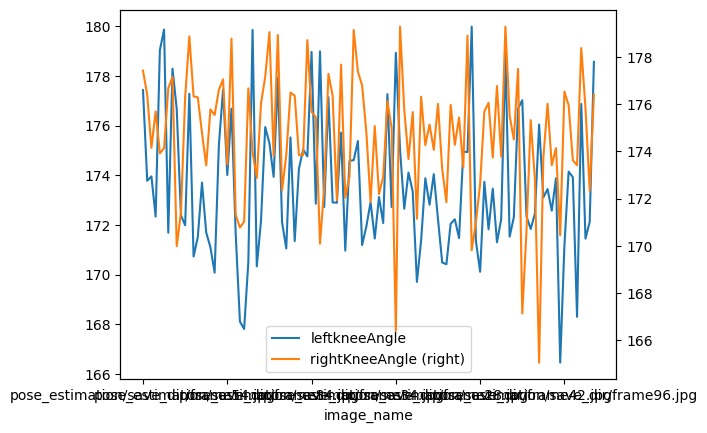

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('FinalDetails.csv')

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'image_name', y = 'leftkneeAngle', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(x = 'image_name', y = 'rightKneeAngle', ax = ax, secondary_y = True)

In [25]:
df.head()

,image_name,Distance_shoulder,Distance_knee,Distance_Kneeshoulder,rightKneeAngle,rightHipAngle,rightTrunkAngle,rightShoulderAngle,rightElbowAngle,rightNeckAngle,leftkneeAngle,leftHipAngle,leftTrunkAngle,leftShoulderAngle,leftElbowAngle
0,pose_estimation/save_dir/frame54.jpg,54.955905,46.282627,0.842177,177.421110,111.560880,10.442324,33.331289,100.433976,5.620749,177.425314,116.680836,10.891589,167.016464,108.542922
1,pose_estimation/save_dir/frame52.jpg,56.289108,44.136765,0.784108,176.392037,108.421827,12.093364,14.613259,58.573358,2.373700,173.778987,112.002543,11.742511,135.429969,48.447551
2,pose_estimation/save_dir/frame2.jpg,61.644849,41.650600,0.675654,174.152715,113.871071,10.041981,95.030363,165.979487,6.532161,173.955368,115.968953,10.476847,115.261438,165.675413
3,pose_estimation/save_dir/frame71.jpg,64.534086,41.146499,0.637593,175.696166,112.909450,10.290711,94.122258,166.402004,5.570064,172.337010,113.949949,10.962630,124.968078,151.191157
4,pose_estimation/save_dir/frame25.jpg,65.075156,53.270392,0.818598,173.920651,107.706672,6.141332,102.924250,167.278247,9.995081,179.031323,120.770247,6.835448,138.697809,146.183300
